In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0],[1],[1],[0]])

In [ ]:
ipLayer = 2
hiddenLayer = 2
opLayer = 1

# initialise random weights
w1 = np.random.uniform(size = (ipLayer, hiddenLayer))
b1 = np.zeros((1, hiddenLayer))

w2 = np.random.uniform(size = (hiddenLayer, opLayer))
b2 = np.zeros((1, opLayer))

i: 0, c:2.845402466124188
i: 500, c:0.14467002059548034
i: 1000, c:0.05195536484437947
i: 1500, c:0.03448316519311826
i: 2000, c:0.027477518470805408
i: 2500, c:0.023856224012718443
i: 3000, c:0.021726454545767118
i: 3500, c:0.020370968727906898
i: 4000, c:0.01945951075391978
i: 4500, c:0.018819984666612537
i: 5000, c:0.01835491730612214
i: 5500, c:0.01800581175140093
i: 6000, c:0.0177360880064245
i: 6500, c:0.017522170618538987
i: 7000, c:0.017348506315122532
i: 7500, c:0.01720463098585917
i: 8000, c:0.017083375358697018
i: 8500, c:0.016979736292506337
i: 9000, c:0.01689015265769741
i: 9500, c:0.016812034333273017
[[0.00407882]
 [0.99590507]
 [0.99590507]
 [0.00443987]]


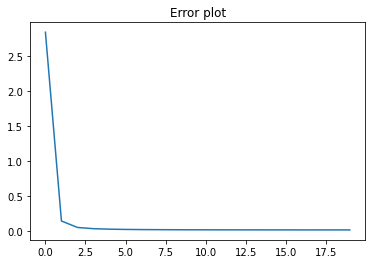

In [ ]:
# define functions

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def forward(X):
  Z = np.tanh(X.dot(w1) + b1)
  return sigmoid(Z.dot(w2) + b2), Z

def predict(X):
  y_hat, _ = forward(X)
  return np.round(y_hat)

def cross_entropy(T,Y):
  return -(T*np.log(Y) + (1-T)*np.log(1-Y)).sum()

def error_rate(targets, predictions):
  return np.mean(targets!=predictions)

def sigmoid_derv(x):
  return x*(1-x)


lr = 0.1 
reg = 0.001
epochs = 10000
errors = []


for i in range(epochs):
  # forward propagation
  y_hat, Z = forward(X)

  # gradient descent step
  y_hat_Y = y_hat - y
  w2 -= lr*(Z.T.dot(y_hat_Y) + reg*w2)
  b2 -= lr*(y_hat_Y).sum(axis=0)

  # this is another way of writing this
  dz = np.outer(y_hat_Y,w2)*(1-Z*Z)

  w1 -= lr*(X.T.dot(dz) + reg*w1) 
  b1 -= lr*(np.sum(dz,axis=0) + reg*b1)

  if i%500==0:
      pYvalid, _ = forward(X)
      c = cross_entropy(y,y_hat)
      errors.append(c)
      # e = error_rate(Yvalid,np.round(pYvalid))
      print(f"i: {i}, c:{c}")


plt.plot(errors)
plt.title('Error plot')
print(y_hat)


Calculate $\frac{\partial L}{\partial w_1}$, $\frac{\partial L}{\partial b_1}$, $\frac{\partial L}{\partial w_2}$, $\frac{\partial L}{\partial b_2}$

Equations are: \\
$ L = -y log \hat{y} + (1-y) log (1-\hat{y}) $ \\
$ \hat{y} = σ(z') = \frac{1}{(1 + e^{-z'})} $ \\
$ z' = z.w_2 + b_2 $ \\
$ z = x.w_1 + b_1 $ 

$\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial z'} * \frac{\partial z'}{\partial z} * \frac{\partial z}{\partial w_1} = -[\frac{y}{\hat {y}} - \frac{1-y}{1- \hat{y}}] [\frac{e^{-z'}}{(1+e^{-z'})^2}] [w_2] [x] $  


$\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial z'} * \frac{\partial z'}{\partial z} * \frac{\partial z}{\partial b_1} = -[\frac{y}{\hat {y}} - \frac{1-y}{1- \hat{y}}][w_2] [\frac{e^{-z'}}{(1+e^{-z'})^2}] [w_2] $

$\frac{\partial L}{\partial w_2} = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial z'} * \frac{\partial z'}{\partial w_2} = -[\frac{y}{\hat {y}} - \frac{1-y}{1- \hat{y}}] [\frac{e^{-z'}}{(1+e^{-z'})^2}] [z] $

$\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial z'} * \frac{\partial z'}{\partial b_2} = -[\frac{y}{\hat {y}} - \frac{1-y}{1- \hat{y}}] [\frac{e^{-z'}}{(1+e^{-z'})^2}] $